In [ ]:
import h5py
import sys
import numpy as np
import matplotlib.pyplot as plt

total_odor_mean = np.zeros((1000, 1000)) # large 2d array to save the average traslated odor field for all source positions
mean_source_y = 500 # source x position for the averaged field
mean_source_x = 500 # source y position for the averaged field

start_time = 1
end_time = 1000

contour_levels = [-4, -3, -2, -1]

source_num = 0 # variable to count number of different source positions

files = ['./15_45.h5', './15_5.h5', './20_65.h5'] # files containing data from differnet source positions

In [ ]:
for file in files:

    source_num +=1
    data=h5py.File(file,'r')

    odor=data['odor_base']

    odor_mean = np.array(odor['1'])*0

    for time in range(start_time, end_time):
        odor_mean = odor_mean + odor[str(time)]

    odor_mean = odor_mean/(end_time - start_time)

    odor_mean = np.array(odor_mean)

    # compute the odor source position
    source_y_vals, source_x_vals = np.where(odor_mean >= 1)
    source_y, source_x = int(round(source_y_vals.mean())), int(round(source_x_vals.mean()))

    # translate the mean odor field and ad it to the total_odor_mean field
    total_odor_mean[mean_source_y - source_y:mean_source_y - source_y + odor_mean.shape[0],mean_source_x - source_x:mean_source_x - source_x + odor_mean.shape[1] ] += odor_mean

total_odor_mean/=source_num



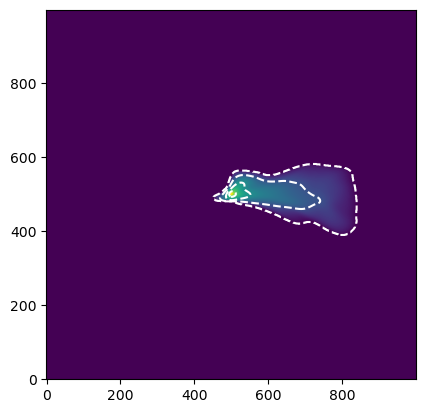

In [ ]:
threshold = -4.0
total_odor_mean[total_odor_mean<=10**threshold] = 10**(-20)
plt.imshow(np.log10(total_odor_mean),origin='lower',vmin=threshold,vmax=0,interpolation='bilinear',cmap='viridis',alpha=1)
plt.contour(np.log10(total_odor_mean), levels=contour_levels, colors='white')